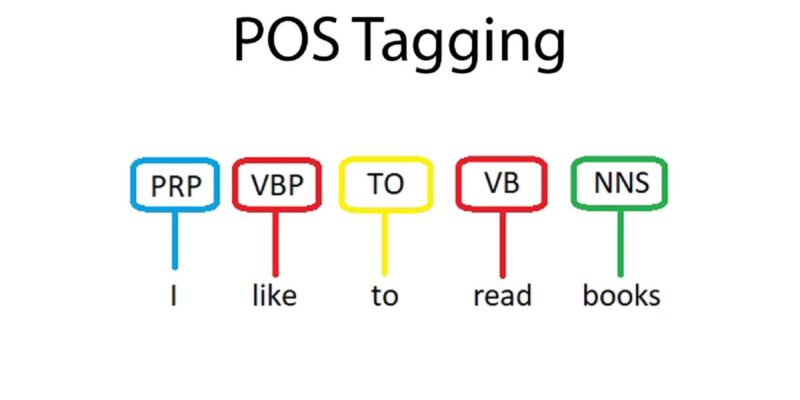

In corpus linguistics, **part-of-speech** tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install nltk

In [43]:
from nltk.tokenize import word_tokenize

s = '''Good muffins cost $3.88\nin New York.  Please buy me two of them.\n\nThanks.'''
tokens = word_tokenize(s)
tokens

['Good',
 'muffins',
 'cost',
 '$',
 '3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

In [44]:
nltk.pos_tag(tokens)

[('Good', 'JJ'),
 ('muffins', 'NNS'),
 ('cost', 'VBP'),
 ('$', '$'),
 ('3.88', 'CD'),
 ('in', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('.', '.'),
 ('Please', 'NNP'),
 ('buy', 'VB'),
 ('me', 'PRP'),
 ('two', 'CD'),
 ('of', 'IN'),
 ('them', 'PRP'),
 ('.', '.'),
 ('Thanks', 'NNS'),
 ('.', '.')]

## Let's get started!

In [4]:
import numpy as np
import pandas as pd

In [5]:
import pandas as pd

train = 'POS_train_ebay_vs_onion_drugs_legal.csv'
test = 'POS_test_ebay_vs_onion_drugs_legal.csv'


df_train = pd.read_csv(train)
df_test = pd.read_csv(test)



In [6]:
df_train.head()

,POS,target
0,PUNCT NOUN PROPN PROPN NOUN PROPN PROPN VERB P...,ebay
1,PROPN PROPN PROPN PUNCT PUNCT NOUN NOUN PUNCT ...,ebay
2,PROPN PROPN PUNCT PUNCT ADV VERB DET NOUN ADP ...,ebay
3,PUNCT PROPN NOUN PUNCT PROPN PROPN PROPN PROPN...,ebay
4,NOUN NOUN PROPN NOUN NOUN ADJ CCONJ ADJ NOUN N...,ebay


In [8]:
df_train["target"].value_counts()


onion_drugs_legal    456
ebay                 456
Name: target, dtype: int64

In [15]:
def convert_target_to_number(df):
    target_clean = []
    for x in df.target:
        if x == 'ebay':
            target_clean.append(0)
        if x == 'onion_drugs_legal':
            target_clean.append(1)
    return np.array(target_clean)

list_train_target = convert_target_to_number(df_train)
list_train_test = convert_target_to_number(df_test)

### Example with custom 

for those who want to understand Bow vs Tf-Idf: https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

In [57]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer()
#
# Create sample set of documents
#
docs = np.array(['This is an example', 'This is an example', 'NLP is an ugly discipline', 'Hello, how are you?'])
#
# Fit the bag-of-words model
#
bag = vectorizer.fit_transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer.get_feature_names())
#
# Associate the indices with each unique word
#
print(vectorizer.vocabulary_)
#
# Print the numerical feature vector
#
print(bag.toarray())

['an', 'are', 'discipline', 'example', 'hello', 'how', 'is', 'nlp', 'this', 'ugly', 'you']
{'this': 8, 'is': 6, 'an': 0, 'example': 3, 'nlp': 7, 'ugly': 9, 'discipline': 2, 'hello': 4, 'how': 5, 'are': 1, 'you': 10}
[[1 0 0 1 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 0 1 0 0]
 [1 0 1 0 0 0 1 1 0 1 0]
 [0 1 0 0 1 1 0 0 0 0 1]]


### implementation with Pos-tag

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
# Multiple documents
text = df_train['POS']


# create the transform
vectorizer = CountVectorizer()


# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

['adj', 'adp', 'adv', 'cconj', 'det', 'intj', 'noun', 'num', 'part', 'pron', 'propn', 'punct', 'sym', 'verb']


In [59]:
# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
#print(vector.shape)

print(vector.toarray())

(912, 14)
[[ 0  0  0 ...  2  0  1]
 [13  4  3 ... 17  0  5]
 [ 3  5  4 ... 10  0  8]
 ...
 [ 0  1  0 ...  1  0  1]
 [ 3  2  0 ...  4  0  4]
 [ 1  2  0 ...  1  0  2]]


In [60]:
len(vector.toarray())

912

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
#
# Creating training data set from bag-of-words  and dummy label
#
X_train = vector.toarray()
y_train = np.array(list_train_target)
#
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
#

In [24]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression classifier
#
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
#
# Fit the model
#
lr.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = lr.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))

LogisticRegression Accuracy 0.789


In [35]:
from sklearn import naive_bayes

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
#
#
Naive.fit(X_train, y_train)
#
# predict the labels on validation dataset
#
predictions_NB = Naive.predict(X_test)

# Use metrics.accuracy_score to measure the score
print("Naive Bayes Accuracy Score %.3f" %metrics.accuracy_score(y_test,predictions_NB))

Naive Bayes Accuracy Score 0.781


In [36]:
from sklearn import svm

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
#
#
SVM.fit(X_train, y_train)
#
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score %.3f" %metrics.accuracy_score(y_test,predictions_SVM))

SVM Accuracy Score 0.754


## try the same thing with tf-Idf....

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(sorted(vectorizer.vocabulary_))
# encode document
vector = vectorizer.transform([text[0]])

['adj', 'adp', 'adv', 'cconj', 'det', 'intj', 'noun', 'num', 'part', 'pron', 'propn', 'punct', 'sym', 'verb']


In [14]:
print(vectorizer.idf_)


[1.49596759 1.40985589 2.0833946  2.1537754  1.87919968 3.20161536
 1.11109679 1.48168163 2.65194991 2.19633501 1.26422799 1.16775133
 2.0964241  1.40163892]
